<a href="https://colab.research.google.com/github/jetowgood/Analysis-of-Alcohol-Sales-in-Iowa/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
alcohol_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa_compressed.csv"
income_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa_income.csv"
population_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa_population.csv"

In [3]:
# import libraries
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# create dataframe for liquor sales, income, population size
df_alcohol = pd.read_csv(alcohol_path)
df_income = pd.read_csv(income_path, header = 1)
df_population = pd.read_csv(population_path, header = 1)

In [5]:
df_income.head()

,Unnamed: 0,2018-2022,2014-2018,2010-2014
0,County Name,Estimate,Estimate,Estimate
1,Adair,"$63,172","$51,859","$47,264"
2,Adams,"$64,750","$49,229","$47,335"
3,Allamakee,"$64,049","$51,057","$47,886"
4,Appanoose,"$50,684","$41,111","$41,525"


In [6]:
# drop first row in dataframe, rename 'County' column, reset indexes
df_income.drop(0, inplace = True)
df_income.rename(columns={"Unnamed: 0": "county"}, inplace = True)
df_income.rename(columns={"2018-2022": "Income: 2018-2022($)"}, inplace = True)
df_income.rename(columns={"2014-2018": "Income: 2014-2018($)"}, inplace = True)
df_income.rename(columns={"2010-2014": "Income: 2010-2014($)"}, inplace = True)

df_income.reset_index(drop = True, inplace = True)
df_income.head()

# change case spelling
df_income['county'] = df_income['county'].str.lower()

In [7]:
# data info, dtype of each column
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   county                99 non-null     object
 1   Income: 2018-2022($)  99 non-null     object
 2   Income: 2014-2018($)  99 non-null     object
 3   Income: 2010-2014($)  99 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [8]:
# change columns to string dtypes
df_income = df_income.convert_dtypes()
# get rid of '$' and ',' within income columns
income_cols = ['Income: 2018-2022($)', 'Income: 2014-2018($)', 'Income: 2010-2014($)']
df_income[income_cols] = df_income[income_cols].replace({'\$':'', ',':''}, regex = True)
# change income columns from strings to numeric
df_income[income_cols] = df_income[income_cols].apply(pd.to_numeric)

df_income.head()

,county,Income: 2018-2022($),Income: 2014-2018($),Income: 2010-2014($)
0,adair,63172,51859,47264
1,adams,64750,49229,47335
2,allamakee,64049,51057,47886
3,appanoose,50684,41111,41525
4,audubon,54973,50397,47556


In [9]:
# Average income in each county from 2010-2022
avg_income = df_income[['Income: 2018-2022($)', 'Income: 2014-2018($)', 'Income: 2010-2014($)']].mean(axis=1)

# add average income column to income df
df_income.insert(4, 'average income', round(avg_income, 0))

# drop income columns
df_income.drop(income_cols, axis = 1, inplace = True)

df_income.head()

,county,average income
0,adair,54098.0
1,adams,53771.0
2,allamakee,54331.0
3,appanoose,44440.0
4,audubon,50975.0


In [10]:
# reset income dataframe index
df_income.reset_index(drop = True)

df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   county          99 non-null     string 
 1   average income  99 non-null     Float64
dtypes: Float64(1), string(1)
memory usage: 1.8 KB


In [11]:
df_income.shape

(99, 2)

In [12]:
df_population.head()

,County Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Adair,"7,679","7,546","7,468","7,387","7,368","7,145","7,005","7,051","7,074","7,152","7,493","7,524","7,457","7,389"
1,Adams,"4,023","3,994","3,910","3,891","3,877","3,754","3,692","3,657","3,644","3,602","3,709","3,638","3,601","3,544"
2,Allamakee,"14,378","14,222","14,149","14,071","14,062","13,874","13,851","13,803","13,852","13,687","14,071","13,968","14,018","14,074"
3,Appanoose,"12,856","12,848","12,707","12,654","12,671","12,577","12,505","12,353","12,401","12,426","12,287","12,269","12,141","12,119"
4,Audubon,"6,098","6,004","5,865","5,863","5,771","5,711","5,626","5,550","5,471","5,496","5,683","5,645","5,575","5,534"


In [13]:
# data info, dtype of each column
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   County Name  99 non-null     object
 1   2010         99 non-null     object
 2   2011         99 non-null     object
 3   2012         99 non-null     object
 4   2013         99 non-null     object
 5   2014         99 non-null     object
 6   2015         99 non-null     object
 7   2016         99 non-null     object
 8   2017         99 non-null     object
 9   2018         99 non-null     object
 10  2019         99 non-null     object
 11  2020         99 non-null     object
 12  2021         99 non-null     object
 13  2022         99 non-null     object
 14  2023         99 non-null     object
dtypes: object(15)
memory usage: 11.7+ KB


In [14]:
# rename county column to match
df_population.rename(columns={'County Name': 'county'}, inplace = True)

df_population['county'] = df_population['county'].str.lower()

# # change dtypes from string
df_population = df_population.convert_dtypes()
# change population columns into numeric
pop_cols = df_population.columns[1:]
df_population[pop_cols] = df_population[pop_cols].replace({',':''}, regex = True)
df_population[pop_cols] = df_population[pop_cols].apply(pd.to_numeric)

df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  99 non-null     string
 1   2010    99 non-null     Int64 
 2   2011    99 non-null     Int64 
 3   2012    99 non-null     Int64 
 4   2013    99 non-null     Int64 
 5   2014    99 non-null     Int64 
 6   2015    99 non-null     Int64 
 7   2016    99 non-null     Int64 
 8   2017    99 non-null     Int64 
 9   2018    99 non-null     Int64 
 10  2019    99 non-null     Int64 
 11  2020    99 non-null     Int64 
 12  2021    99 non-null     Int64 
 13  2022    99 non-null     Int64 
 14  2023    99 non-null     Int64 
dtypes: Int64(14), string(1)
memory usage: 13.1 KB


In [15]:
# find average population
avg_pop = df_population.iloc[:, 1:].mean(axis=1)

# add column to population df
df_population.insert(1, 'average population', round(avg_pop, 0))

# drop population columns
df_population.drop(pop_cols, axis = 1, inplace = True)

df_population.head()

,county,average population
0,adair,7338.0
1,adams,3753.0
2,allamakee,14006.0
3,appanoose,12487.0
4,audubon,5707.0


In [16]:
df_population.shape

(99, 2)

In [17]:
df_alcohol.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-15941000030,11/28/2018,2536,HY-VEE / PLEASANT HILL,4815 MAPLE DRIVE,PLEASANT HILL,50317.0,POINT (-93.519187 41.598109),77.0,POLK,...,26586,GENTLEMAN JACK,12,750,20.01,30.02,2,60.04,1.50,0.39
1,INV-72674800099,07/29/2024,10165,SUPER MARKET / DAVENPORT,6723 NORTHWEST BOULEVARD,DAVENPORT,52806,POINT (-90.608956036 41.589559983),NaN,SCOTT,...,80365,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,6,750,13.00,19.50,1,19.50,0.75,0.19
2,INV-23115800035,11/08/2019,5851,CASEY'S GENERAL STORE #74 - MORNING SUN,618 S CHURCH STREET,MORNING SUN,52640,POINT (-91.254443 41.089418),58.0,LOUISA,...,64858,FIREBALL CINNAMON WHISKEY MINI DISPENSER,1,50,30.00,45.00,1,45.00,0.05,0.01
3,S18074600012,03/25/2014,4490,CASEY'S GENERAL STORE #2766 / CEDAR,380 33RD AVE SW,CEDAR RAPIDS,52404,POINT (-91.67222100000001 41.944954),57.0,LINN,...,26826,JACK DANIELS OLD #7 BLACK LBL,12,750,14.04,21.05,3,63.15,2.25,0.59
4,INV-29537400055,08/18/2020,2535,HY-VEE FOOD STORE #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265.0,NaN,77.0,POLK,...,88296,PATRON SILVER,12,750,27.50,41.25,1,41.25,0.75,0.19


In [18]:
# data info, dtype of each column
# some columns have missing values
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    500000 non-null  object 
 1   Date                   500000 non-null  object 
 2   Store Number           500000 non-null  int64  
 3   Store Name             500000 non-null  object 
 4   Address                498607 non-null  object 
 5   City                   498607 non-null  object 
 6   Zip Code               498606 non-null  object 
 7   Store Location         458648 non-null  object 
 8   County Number          403838 non-null  float64
 9   County                 497361 non-null  object 
 10  Category               499717 non-null  float64
 11  Category Name          499575 non-null  object 
 12  Vendor Number          500000 non-null  float64
 13  Vendor Name            500000 non-null  object 
 14  Item Number            500000 non-nu

In [19]:
# drop data columns
drop_columns = ['Date','Store Name', 'Address', 'City', 'Zip Code',
                'Store Location', 'County Number', 'Vendor Number',
                'Vendor Name', 'Pack', 'Bottle Volume (ml)',
                'Volume Sold (Gallons)', 'Category', 'Invoice/Item Number',
                'Item Number']
df_alcohol.drop(drop_columns, axis=1, inplace=True)

# checking for missing values
print(df_alcohol.isna().sum())

Store Number               0
County                  2639
Category Name            425
Item Description           0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
dtype: int64


In [20]:
# drop na/null values
df_alcohol.dropna(inplace=True)
print(df_alcohol.isna().sum())

print(df_alcohol.shape)

Store Number            0
County                  0
Category Name           0
Item Description        0
State Bottle Cost       0
State Bottle Retail     0
Bottles Sold            0
Sale (Dollars)          0
Volume Sold (Liters)    0
dtype: int64
(496944, 9)


In [21]:
df_alcohol.shape

(496944, 9)

In [22]:
df_alcohol['County'] = df_alcohol['County'].str.lower()
df_alcohol.head()

,Store Number,County,Category Name,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2536,polk,TENNESSEE WHISKIES,GENTLEMAN JACK,20.01,30.02,2,60.04,1.50
1,10165,scott,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,13.00,19.50,1,19.50,0.75
2,5851,louisa,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY MINI DISPENSER,30.00,45.00,1,45.00,0.05
3,4490,linn,TENNESSEE WHISKIES,JACK DANIELS OLD #7 BLACK LBL,14.04,21.05,3,63.15,2.25
4,2535,polk,100% AGAVE TEQUILA,PATRON SILVER,27.50,41.25,1,41.25,0.75


## New Stuff

In [23]:
average_sales = df_alcohol.groupby('County')['Sale (Dollars)'].mean().reset_index()
average_sales.rename(columns={'Sale (Dollars)': 'average sales (dollars)'}, inplace=True)
average_sales.head()

,County,average sales (dollars)
0,adair,92.907298
1,adams,75.543738
2,allamakee,94.507491
3,appanoose,116.234789
4,audubon,73.304917


In [24]:
average_volume = df_alcohol.groupby('County')['Volume Sold (Liters)'].mean().reset_index()
average_volume.rename(columns={'Volume Sold (Liters)': 'average volume sold (liters)'}, inplace=True)
average_volume.head()

,County,average volume sold (liters)
0,adair,6.604661
1,adams,4.662970
2,allamakee,7.133345
3,appanoose,8.023837
4,audubon,5.726239


In [25]:
num_stores = df_alcohol.groupby('County')['Store Number'].nunique().reset_index()
num_stores.rename(columns={'Store Number': 'number of stores'}, inplace=True)
num_stores.head()

,County,number of stores
0,adair,13
1,adams,4
2,allamakee,18
3,appanoose,11
4,audubon,5


In [26]:
avg_cost = df_alcohol.groupby('County')['State Bottle Cost'].mean().reset_index()
avg_cost.rename(columns={'State Bottle Cost': 'average bottle cost'}, inplace=True)
avg_cost.head()

,County,average bottle cost
0,adair,10.037567
1,adams,11.557649
2,allamakee,10.534171
3,appanoose,10.357628
4,audubon,9.395193


In [27]:
num_categories = df_alcohol.groupby('County')['Category Name'].nunique().reset_index()
num_categories.rename(columns={'Category Name': 'number of alcohol categories'}, inplace=True)
num_categories.head()

,County,number of alcohol categories
0,adair,60
1,adams,52
2,allamakee,76
3,appanoose,71
4,audubon,56


In [28]:
avg_income = df_income['average income']
avg_population = df_population['average population']

In [29]:
slm_path = "/content/drive/My Drive/ASU/DAT 490 Capstone/iowa slm.csv"
df_slm = pd.read_csv(slm_path)
df_slm.head()

/tmp/ipython-input-29-275633820.py:2: DtypeWarning: Columns (0,2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_slm = pd.read_csv(slm_path)


,County Name,Congregations,Adherents,University Count,Urban Population Percentage,Rural Population Percentage,Classification,Median Age
0,Adair,19.0,"2,536",0.0,0.00%,100.00%,Rural,43.0
1,Adams,11.0,"1,446",0.0,0.00%,100.00%,Rural,46.3
2,Allamakee,37.0,"8,913",0.0,0.00%,100.00%,Rural,43.1
3,Appanoose,30.0,"3,968",0.0,42.78%,57.22%,Rural,45.0
4,Audubon,18.0,"3,000",0.0,0.00%,100.00%,Rural,48.2


In [30]:
df_slm['Average Population'], df_slm['Average Income'] = avg_population, avg_income
df_slm['Number of Alcohol Categories'] = num_categories['number of alcohol categories']
df_slm['Average Alcohol Bottle Cost'] = avg_cost['average bottle cost']
df_slm['Number of Stores'] = num_stores['number of stores']
df_slm['Average Sales (Dollars)'] = average_sales['average sales (dollars)']
df_slm['Average Volume Sold (Liters)'] = average_volume['average volume sold (liters)']
df_slm.head()

,County Name,Congregations,Adherents,University Count,Urban Population Percentage,Rural Population Percentage,Classification,Median Age,Average Population,Average Income,Number of Alcohol Categories,Average Alcohol Bottle Cost,Number of Stores,Average Sales (Dollars),Average Volume Sold (Liters)
0,Adair,19.0,"2,536",0.0,0.00%,100.00%,Rural,43.0,7338.0,54098.0,60.0,10.037567,13.0,92.907298,6.604661
1,Adams,11.0,"1,446",0.0,0.00%,100.00%,Rural,46.3,3753.0,53771.0,52.0,11.557649,4.0,75.543738,4.662970
2,Allamakee,37.0,"8,913",0.0,0.00%,100.00%,Rural,43.1,14006.0,54331.0,76.0,10.534171,18.0,94.507491,7.133345
3,Appanoose,30.0,"3,968",0.0,42.78%,57.22%,Rural,45.0,12487.0,44440.0,71.0,10.357628,11.0,116.234789,8.023837
4,Audubon,18.0,"3,000",0.0,0.00%,100.00%,Rural,48.2,5707.0,50975.0,56.0,9.395193,5.0,73.304917,5.726239


In [31]:
# data types
df_slm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045440 entries, 0 to 1045439
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   County Name                   99 non-null     object 
 1   Congregations                 99 non-null     float64
 2   Adherents                     99 non-null     object 
 3   University Count              99 non-null     float64
 4   Urban Population Percentage   99 non-null     object 
 5   Rural Population Percentage   99 non-null     object 
 6   Classification                99 non-null     object 
 7   Median Age                    99 non-null     float64
 8   Average Population            99 non-null     Float64
 9   Average Income                99 non-null     Float64
 10  Number of Alcohol Categories  100 non-null    float64
 11  Average Alcohol Bottle Cost   100 non-null    float64
 12  Number of Stores              100 non-null    float64
 1

In [32]:
# convert dtypes
df_slm = df_slm.convert_dtypes()
df_slm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045440 entries, 0 to 1045439
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   County Name                   99 non-null     string 
 1   Congregations                 99 non-null     Int64  
 2   Adherents                     99 non-null     string 
 3   University Count              99 non-null     Int64  
 4   Urban Population Percentage   99 non-null     string 
 5   Rural Population Percentage   99 non-null     string 
 6   Classification                99 non-null     string 
 7   Median Age                    99 non-null     Float64
 8   Average Population            99 non-null     Float64
 9   Average Income                99 non-null     Float64
 10  Number of Alcohol Categories  100 non-null    Int64  
 11  Average Alcohol Bottle Cost   100 non-null    Float64
 12  Number of Stores              100 non-null    Int64  
 1

In [33]:
# get rid of '%'
pop_percent = ['Urban Population Percentage', 'Rural Population Percentage']
df_slm[pop_percent] = df_slm[pop_percent].replace({'%':''}, regex = True)

# change columns from strings to numeric
df_slm[pop_percent] = df_slm[pop_percent].apply(pd.to_numeric)
df_slm[pop_percent] = df_slm[pop_percent]/100
df_slm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045440 entries, 0 to 1045439
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   County Name                   99 non-null     string 
 1   Congregations                 99 non-null     Int64  
 2   Adherents                     99 non-null     string 
 3   University Count              99 non-null     Int64  
 4   Urban Population Percentage   99 non-null     Float64
 5   Rural Population Percentage   99 non-null     Float64
 6   Classification                99 non-null     string 
 7   Median Age                    99 non-null     Float64
 8   Average Population            99 non-null     Float64
 9   Average Income                99 non-null     Float64
 10  Number of Alcohol Categories  100 non-null    Int64  
 11  Average Alcohol Bottle Cost   100 non-null    Float64
 12  Number of Stores              100 non-null    Int64  
 1

In [34]:
# fix adherents column
df_slm['Adherents'] = df_slm['Adherents'].replace({',': ''}, regex = True)
df_slm['Adherents'] = df_slm['Adherents'].apply(pd.to_numeric)
df_slm['Adherents Percentage'] = df_slm['Adherents']/df_slm['Average Population']
df_slm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045440 entries, 0 to 1045439
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   County Name                   99 non-null     string 
 1   Congregations                 99 non-null     Int64  
 2   Adherents                     99 non-null     float64
 3   University Count              99 non-null     Int64  
 4   Urban Population Percentage   99 non-null     Float64
 5   Rural Population Percentage   99 non-null     Float64
 6   Classification                99 non-null     string 
 7   Median Age                    99 non-null     Float64
 8   Average Population            99 non-null     Float64
 9   Average Income                99 non-null     Float64
 10  Number of Alcohol Categories  100 non-null    Int64  
 11  Average Alcohol Bottle Cost   100 non-null    Float64
 12  Number of Stores              100 non-null    Int64  
 1

In [35]:
df_slm.drop(['Adherents'], axis = 1, inplace = True)
df_slm.head()

,County Name,Congregations,University Count,Urban Population Percentage,Rural Population Percentage,Classification,Median Age,Average Population,Average Income,Number of Alcohol Categories,Average Alcohol Bottle Cost,Number of Stores,Average Sales (Dollars),Average Volume Sold (Liters),Adherents Percentage
0,Adair,19,0,0.0,1.0,Rural,43.0,7338.0,54098.0,60,10.037567,13,92.907298,6.604661,0.345598
1,Adams,11,0,0.0,1.0,Rural,46.3,3753.0,53771.0,52,11.557649,4,75.543738,4.66297,0.385292
2,Allamakee,37,0,0.0,1.0,Rural,43.1,14006.0,54331.0,76,10.534171,18,94.507491,7.133345,0.63637
3,Appanoose,30,0,0.4278,0.5722,Rural,45.0,12487.0,44440.0,71,10.357628,11,116.234789,8.023837,0.31777
4,Audubon,18,0,0.0,1.0,Rural,48.2,5707.0,50975.0,56,9.395193,5,73.304917,5.726239,0.52567


In [36]:
df_slm.dropna(inplace=True)
df_slm.shape

(99, 15)

In [37]:
df_slm.head(10)

,County Name,Congregations,University Count,Urban Population Percentage,Rural Population Percentage,Classification,Median Age,Average Population,Average Income,Number of Alcohol Categories,Average Alcohol Bottle Cost,Number of Stores,Average Sales (Dollars),Average Volume Sold (Liters),Adherents Percentage
0,Adair,19,0,0.0,1.0,Rural,43.0,7338.0,54098.0,60,10.037567,13,92.907298,6.604661,0.345598
1,Adams,11,0,0.0,1.0,Rural,46.3,3753.0,53771.0,52,11.557649,4,75.543738,4.66297,0.385292
2,Allamakee,37,0,0.0,1.0,Rural,43.1,14006.0,54331.0,76,10.534171,18,94.507491,7.133345,0.63637
3,Appanoose,30,0,0.4278,0.5722,Rural,45.0,12487.0,44440.0,71,10.357628,11,116.234789,8.023837,0.31777
4,Audubon,18,0,0.0,1.0,Rural,48.2,5707.0,50975.0,56,9.395193,5,73.304917,5.726239,0.52567
5,Benton,44,0,0.1869,0.8131,Rural,43.0,25734.0,68035.0,74,10.31472,24,97.032051,7.200921,0.446336
6,Black Hawk,168,3,0.8703,0.1297,Urban,35.5,131790.0,54006.0,92,10.314022,176,146.530614,8.908187,0.487268
7,Boone,46,0,0.4683,0.5317,Rural,42.0,26410.0,63195.0,80,10.316045,25,133.631893,9.894146,0.467626
8,Bremer,47,1,0.3665,0.6335,Urban,38.9,24816.0,71456.0,82,10.650037,18,117.140335,8.192119,0.610493
9,Buchanan,43,0,0.3292,0.6708,Rural,39.5,20951.0,63765.0,82,10.329336,25,120.12428,8.633576,0.506897


In [38]:
df_slm.isna().sum()

,0
County Name,0
Congregations,0
University Count,0
Urban Population Percentage,0
Rural Population Percentage,0
Classification,0
Median Age,0
Average Population,0
Average Income,0
Number of Alcohol Categories,0


In [39]:
# select target variables
X = df_slm[df_slm.columns.difference(['Average Sales (Dollars)', 'County Name'])]
y = df_slm['Average Sales (Dollars)']

In [40]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [41]:
# import scalers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# import pipeline and column transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# select numeric
# with volume
numeric_vol = X_train[['Congregations','Adherents Percentage', 'University Count', 'Urban Population Percentage', 'Rural Population Percentage',
                          'Median Age', 'Average Population', 'Average Income', 'Number of Alcohol Categories',
                          'Average Alcohol Bottle Cost', 'Number of Stores', 'Average Volume Sold (Liters)']]

# without volume
numeric = X_train[['Congregations','Adherents Percentage', 'University Count', 'Urban Population Percentage', 'Rural Population Percentage',
                          'Median Age', 'Average Population', 'Average Income', 'Number of Alcohol Categories',
                          'Average Alcohol Bottle Cost', 'Number of Stores']]

# select categorical
categorical = X_train[['Classification']]

In [42]:
# pipelines
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

# with volume
preprocessing_vol = ColumnTransformer([
    ("num", num_pipeline, numeric_vol.columns),
    ("cat", cat_pipeline, categorical.columns)
])

# without volume
preprocessing = ColumnTransformer([
    ("num", num_pipeline, numeric.columns),
    ("cat", cat_pipeline, categorical.columns)
])

In [43]:
# prepare the training data
prepared_data_vol = preprocessing_vol.fit_transform(X_train)

prepared_data = preprocessing.fit_transform(X_train)

In [44]:
# put prepared training data into a to dataframe - with volume
X_train_vol_prepared = pd.DataFrame(prepared_data_vol,
                                columns = preprocessing_vol.get_feature_names_out(),
                                index = X_train.index)
X_train_vol_prepared

,num__Congregations,num__Adherents Percentage,num__University Count,num__Urban Population Percentage,num__Rural Population Percentage,num__Median Age,num__Average Population,num__Average Income,num__Number of Alcohol Categories,num__Average Alcohol Bottle Cost,num__Number of Stores,num__Average Volume Sold (Liters),cat__Classification_Rural,cat__Classification_Urban
61,0.004853,-0.367731,0.676843,0.820788,-0.820788,-0.496442,-0.147320,-0.306859,-0.048384,0.362052,-0.375640,-0.228626,0.0,1.0
67,-0.889654,0.064011,-0.538398,-1.096945,1.096945,0.049863,-0.538424,-0.018147,-0.273227,-0.246587,-0.414585,-1.935836,1.0,0.0
81,3.135627,-0.624774,3.107325,1.845479,-1.845479,-0.755218,3.907458,0.540352,0.176459,0.604875,-0.239335,-0.617555,0.0,1.0
89,0.516000,-1.510646,0.676843,1.298525,-1.298525,-0.553948,0.208120,-1.409077,-1.922075,-0.745614,-0.453529,-0.869322,0.0,1.0
9,-0.059041,0.232802,-0.538398,0.020036,-0.020036,-0.525195,-0.181435,0.816494,0.776040,-0.279815,-0.103030,0.466676,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,-0.474348,-1.316781,-0.538398,0.354587,-0.354587,1.056213,-0.411334,-1.853059,-0.048384,-0.238705,-0.375640,0.155392,1.0,0.0
32,0.196533,-0.072483,0.676843,-0.075986,0.075986,0.596167,-0.207945,-1.015931,-0.123332,-0.090549,-0.453529,0.578253,0.0,1.0
22,0.835466,-0.031773,-0.538398,1.273077,-1.273077,0.337391,0.535692,-0.574574,1.075831,0.290095,0.247469,1.294110,1.0,0.0
5,-0.027094,-0.263400,-0.538398,-0.462790,0.462790,0.481156,-0.051520,1.406351,0.176459,-0.301053,-0.122502,-0.264723,1.0,0.0


In [45]:
# put prepared training data into a to dataframe - without volume
X_train_prepared = pd.DataFrame(prepared_data,
                                columns = preprocessing.get_feature_names_out(),
                                index = X_train.index)
X_train_prepared

,num__Congregations,num__Adherents Percentage,num__University Count,num__Urban Population Percentage,num__Rural Population Percentage,num__Median Age,num__Average Population,num__Average Income,num__Number of Alcohol Categories,num__Average Alcohol Bottle Cost,num__Number of Stores,cat__Classification_Rural,cat__Classification_Urban
61,0.004853,-0.367731,0.676843,0.820788,-0.820788,-0.496442,-0.147320,-0.306859,-0.048384,0.362052,-0.375640,0.0,1.0
67,-0.889654,0.064011,-0.538398,-1.096945,1.096945,0.049863,-0.538424,-0.018147,-0.273227,-0.246587,-0.414585,1.0,0.0
81,3.135627,-0.624774,3.107325,1.845479,-1.845479,-0.755218,3.907458,0.540352,0.176459,0.604875,-0.239335,0.0,1.0
89,0.516000,-1.510646,0.676843,1.298525,-1.298525,-0.553948,0.208120,-1.409077,-1.922075,-0.745614,-0.453529,0.0,1.0
9,-0.059041,0.232802,-0.538398,0.020036,-0.020036,-0.525195,-0.181435,0.816494,0.776040,-0.279815,-0.103030,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,-0.474348,-1.316781,-0.538398,0.354587,-0.354587,1.056213,-0.411334,-1.853059,-0.048384,-0.238705,-0.375640,1.0,0.0
32,0.196533,-0.072483,0.676843,-0.075986,0.075986,0.596167,-0.207945,-1.015931,-0.123332,-0.090549,-0.453529,0.0,1.0
22,0.835466,-0.031773,-0.538398,1.273077,-1.273077,0.337391,0.535692,-0.574574,1.075831,0.290095,0.247469,1.0,0.0
5,-0.027094,-0.263400,-0.538398,-0.462790,0.462790,0.481156,-0.051520,1.406351,0.176459,-0.301053,-0.122502,1.0,0.0


In [46]:
# now testing data - with volume
prepared_data_vol = preprocessing_vol.transform(X_test)

X_test_vol_prepared = pd.DataFrame(prepared_data_vol,
                               columns = preprocessing_vol.get_feature_names_out(),
                               index = X_test.index)

In [47]:
# now testing data - without volume
prepared_data = preprocessing.transform(X_test)

X_test_prepared = pd.DataFrame(prepared_data,
                               columns = preprocessing.get_feature_names_out(),
                               index = X_test.index)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# linear regression model - with volume
lin_reg_vol = LinearRegression()
lin_reg_vol.fit(X_train_vol_prepared, y_train)

LinearRegression()

In [50]:
# linear regression model - with volume
y_pred_vol = lin_reg_vol.predict(X_test_vol_prepared)

df_linreg_vol = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_vol.flatten()})
print(df_linreg_vol.head(10))

        Actual   Predicted
71   99.207042  109.683410
30  148.898079  139.008696
14  124.364998  126.569541
94  135.031902  128.668114
0    92.907298   92.777808
36  115.768188   74.962009
72   86.704923   82.313342
13  153.990036  148.669051
76   94.735032  107.199827
85  141.978886  148.085494


In [51]:
# linear regression model - without volume
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [52]:
# linear regression model - without volume
y_pred = lin_reg.predict(X_test_prepared)

df_linreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df_linreg.head(10))

        Actual   Predicted
71   99.207042  113.258126
30  148.898079  119.363636
14  124.364998  119.279098
94  135.031902  109.614962
0    92.907298   86.323750
36  115.768188   68.046472
72   86.704923   97.264127
13  153.990036  135.929555
76   94.735032   96.857918
85  141.978886  152.781067


In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
print(f'Linear Regression with volume RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_vol))}')
print(f'Linear Regression with volume R^2 Score: {r2_score(y_test, y_pred_vol)}')

Linear Regression with volume RMSE: 11.650267084646039
Linear Regression with volume R^2 Score: 0.8189552273732071


In [55]:
print(f'Linear Regression without volume RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Linear Regression without volume R^2 Score: {r2_score(y_test, y_pred)}')

Linear Regression without volume RMSE: 25.39862035489767
Linear Regression without volume R^2 Score: 0.1395324847325481


Linear regression performs substantially better with average volume sold as a feature.

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
# random forest regression models
rf_reg = RandomForestRegressor()
rf_reg_vol = RandomForestRegressor()

In [59]:
# with volume
rf_reg_vol.fit(X_train_vol_prepared, y_train)

y_vol_pred_rf = rf_reg_vol.predict(X_test_vol_prepared)

df_rfreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_vol_pred_rf})
print(df_rfreg.head(10))

        Actual   Predicted
71   99.207042   99.369278
30  148.898079  140.123443
14  124.364998  123.103938
94  135.031902  126.173354
0    92.907298   90.415872
36  115.768188   83.837023
72   86.704923   87.219182
13  153.990036  167.660170
76   94.735032  124.662596
85  141.978886  139.378834


In [60]:
# with volume
rf_reg_vol.fit(X_train_vol_prepared, y_train)

RandomForestRegressor()

In [61]:
# without volume
rf_reg.fit(X_train_prepared, y_train)

RandomForestRegressor()

In [62]:
# without volume
y_pred_rf = rf_reg.predict(X_test_prepared)

df_rfreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(df_rfreg.head(10))

        Actual   Predicted
71   99.207042  108.049529
30  148.898079  165.821685
14  124.364998  111.586930
94  135.031902  124.709942
0    92.907298   84.697129
36  115.768188   81.070459
72   86.704923   83.928972
13  153.990036  113.767439
76   94.735032   91.631433
85  141.978886  163.379461


In [63]:
print(f'Random Forest with volume RMSE: {np.sqrt(mean_squared_error(y_test, y_vol_pred_rf))}')
print(f'Random Forest with volume R^2 Score: {r2_score(y_test, y_vol_pred_rf)}')

Random Forest with volume RMSE: 12.027453137818148
Random Forest with volume R^2 Score: 0.8070425402168504


In [64]:
print(f'Random Forest without volume RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}')
print(f'Random Forest without volume R^2 Score: {r2_score(y_test, y_pred_rf)}')

Random Forest without volume RMSE: 27.212794984451957
Random Forest without volume R^2 Score: 0.01221932386208624


Again, the model performs better with average volume sold as a feature. Purpose of second model is mainly to look at the feature importance ranking.

In [65]:
# with volume
imp_vol = rf_reg_vol.feature_importances_
df_importance_vol = pd.DataFrame({'Feature': X_train_vol_prepared.columns, 'Importance': imp_vol})
df_importance_vol = df_importance_vol.sort_values('Importance', ascending = False)
print(df_importance_vol)

                              Feature  Importance
11  num__Average Volume Sold (Liters)    0.872751
7                 num__Average Income    0.028901
9    num__Average Alcohol Bottle Cost    0.025294
10              num__Number of Stores    0.020218
8   num__Number of Alcohol Categories    0.016340
5                     num__Median Age    0.008650
1           num__Adherents Percentage    0.005575
4    num__Rural Population Percentage    0.005572
6             num__Average Population    0.004998
0                  num__Congregations    0.004842
3    num__Urban Population Percentage    0.003933
12          cat__Classification_Rural    0.001707
2               num__University Count    0.000804
13          cat__Classification_Urban    0.000416


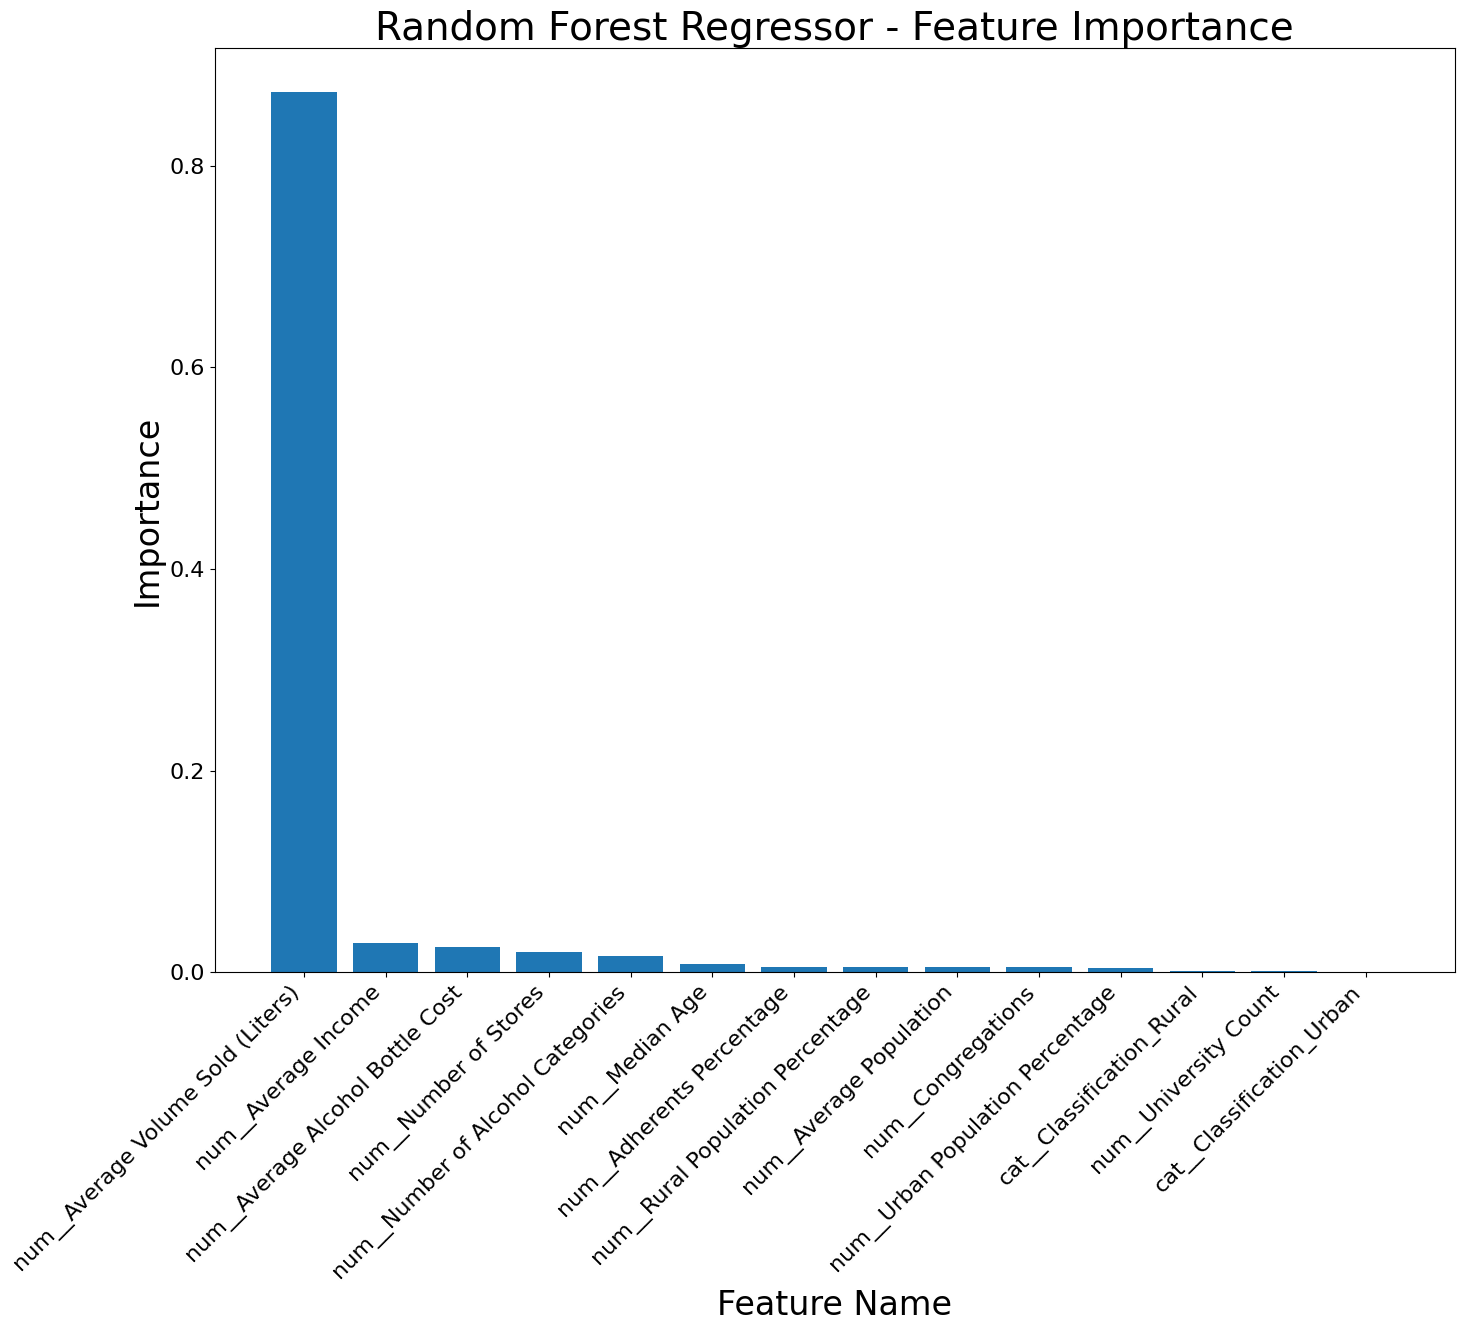

In [66]:
plt.figure(figsize = (16,12))
plt.bar(df_importance_vol['Feature'], df_importance_vol['Importance'])
plt.xlabel('Feature Name', fontsize = 24)
plt.ylabel('Importance', fontsize = 24)
plt.title('Random Forest Regressor - Feature Importance', fontsize = 28)
plt.xticks(rotation = 45, ha = 'right', fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [67]:
# without volume
imp = rf_reg.feature_importances_
df_importance = pd.DataFrame({'Feature': X_train_prepared.columns, 'Importance': imp})
df_importance = df_importance.sort_values('Importance', ascending = False)
print(df_importance)

                              Feature  Importance
10              num__Number of Stores    0.339304
8   num__Number of Alcohol Categories    0.250431
9    num__Average Alcohol Bottle Cost    0.120720
7                 num__Average Income    0.058602
5                     num__Median Age    0.058068
1           num__Adherents Percentage    0.054469
0                  num__Congregations    0.042365
6             num__Average Population    0.027156
4    num__Rural Population Percentage    0.020029
3    num__Urban Population Percentage    0.019114
11          cat__Classification_Rural    0.004063
2               num__University Count    0.003328
12          cat__Classification_Urban    0.002352


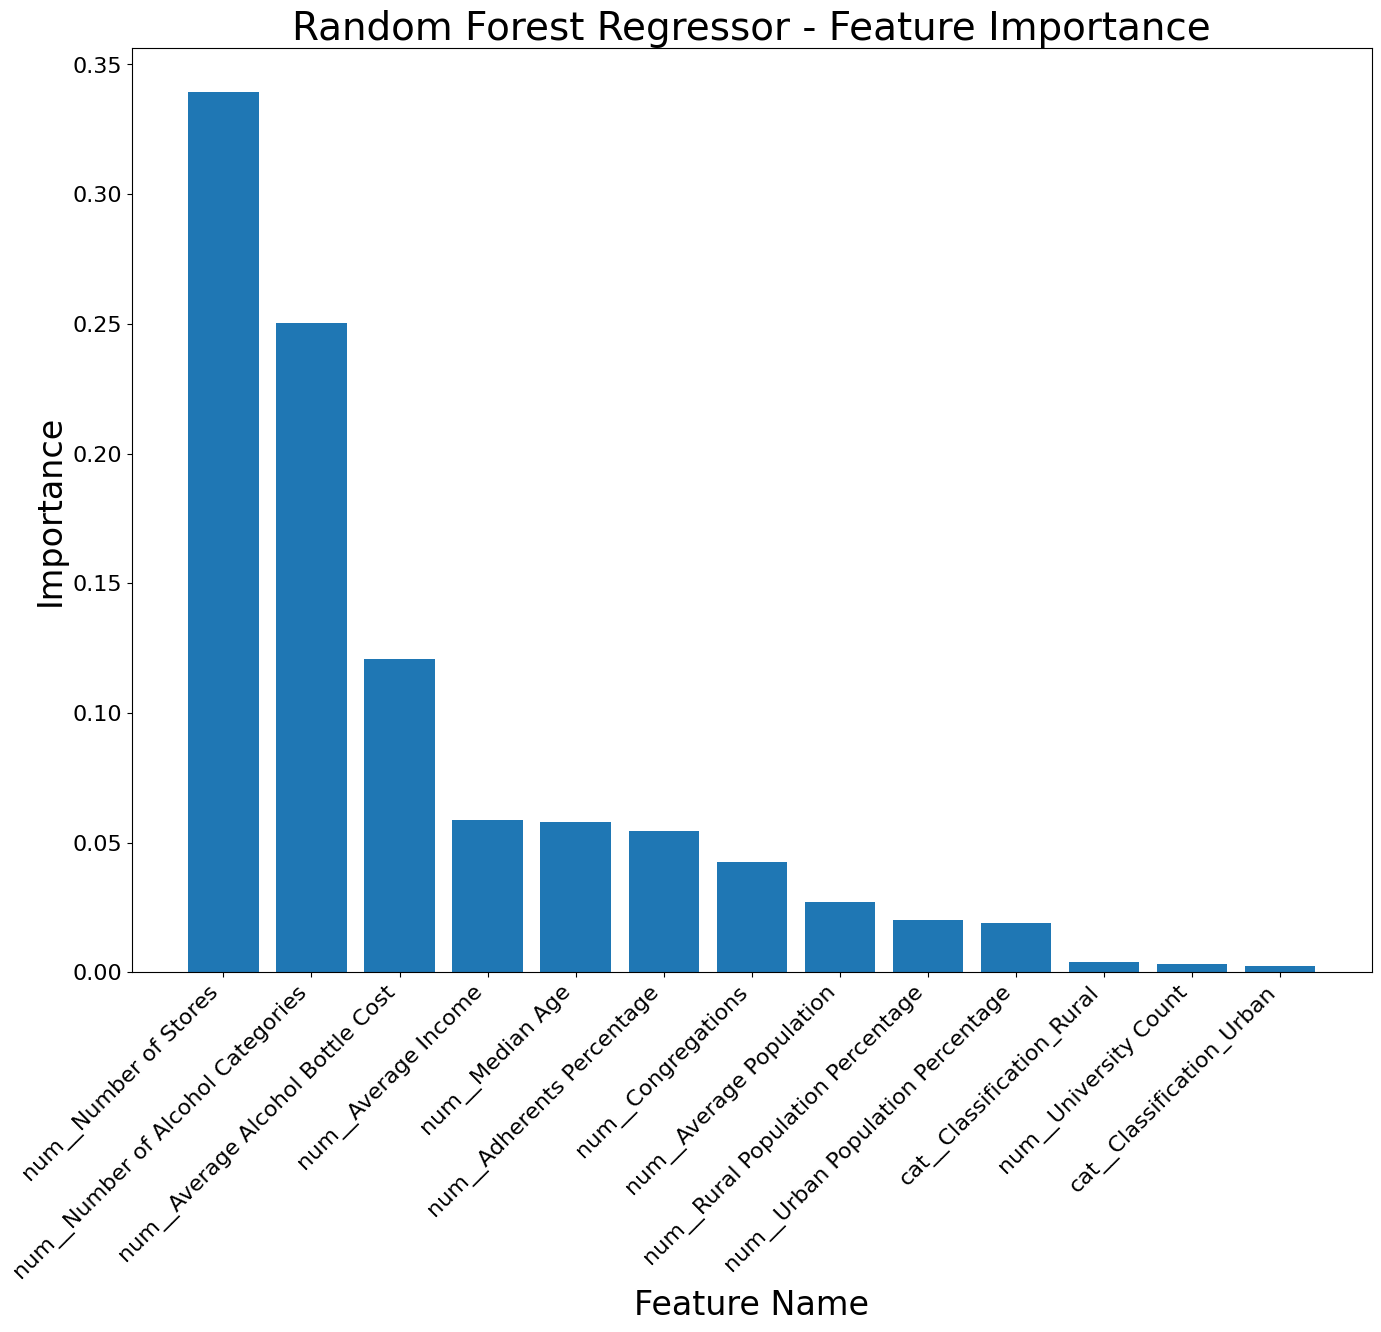

In [68]:
plt.figure(figsize = (16,12))
plt.bar(df_importance['Feature'], df_importance['Importance'])
plt.xlabel('Feature Name', fontsize = 24)
plt.ylabel('Importance', fontsize = 24)
plt.title('Random Forest Regressor - Feature Importance', fontsize = 28)
plt.xticks(rotation = 45, ha = 'right', fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()